# numpy笔记

In [2]:
import numpy as np

## numpy基本对象
### N维数组对象
#### 数组的属性
* N维数组对象ndarry与通用函数对象ufunc两种。  
* ndarry有两个主要属性，一是数组中元素的数据类型dtype，第二个是数组的维度，数组的维度是一个元组（N-tuple）
    * 大小（size）
    * 每项的大小（itemsize）：单个元素的字节长度
    * 数据（data）：指向数组的起始地址
    * 维度（ndim）

In [11]:
x = np.array(((1, 2, 3), (4, 5, 6)))
print('行列数：', x.shape)
print('数据类型：', x.dtype)
print('大小：', x.size)
print('每项大小：', x.itemsize)
print('维度：', x.ndim)
print('数组地址：', x.data)

行列数： (2, 3)
数据类型： int32
大小： 6
每项大小： 4
维度： 2
数组地址： <memory at 0xa9738f0c>


#### 数组的操作
* 使用[]的数组索引，[row, column]
* 数组切片，start:stop:step
    * 省略号可以用来替换多个或者零个冒号

In [21]:
x = np.ndarray((4, 5, 6), int)
print('在x[1,1]的数组上每3个数取一个：')
print(x[1, 1, ::3])
print('x[1]:')
print(x[1, ...])  #等效x[1,:,:]

在x[1,1]的数组上每3个数取一个：
[-15053270   7471216]
x[1]:
[[   6094897 1701869188 1309310660    3369935 1701858858 1308644310]
 [ -15053270    2687015    7209052    7471216    7209065    2621556]
 [   5963896    2883633    2883633    3801146    6094899    6029353]
 [   7340142    6881394    7602286    2555944    5963896    6094897]
 [   2555962    6029353    7340142    6881394    7602286    7864360]]


* 数组的变换
    * ravel和reshape不改变原数组
    * resize和指定数组维度属性的办法会改变原数组

In [32]:
x = np.array(((1, 2, 3), (4, 5, 6), (7, 8, 9), (10, 11, 12)))
print('ravel显示展开的数组：')
x.ravel
x.resize((3, 4))
print('resize会改变原数组：')
print(x)
print('reshape不改变原数组：')
print(x.reshape(2, 6))
print(x)
print('指定数组维度：')
x.shape = (4, 3)
print(x)

ravel显示展开的数组：
resize会改变原数组：
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
reshape不改变原数组：
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
指定数组维度：
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


#### 与数组有关的类
* 矩阵子类matrix  

In [33]:
mx1 = np.matrix(((1, 2, 3), (4, 5, 6), (7, 8, 9)))
mx2 = np.matrix(((1, 2, 3), (4, 5, 6), (7, 8, 9)))
print('矩阵乘法：')
print(mx1 * mx2)
print('矩阵幂：')
print(mx1**2)

矩阵乘法：
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
矩阵幂：
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


* 掩码数组
    * 和python里的列表生成式很像
    * 掩码中的一个true值反应了数组里相应的值是无效的

In [38]:
import numpy.ma as ma
x = np.array((1, 2, 3, 4, 5, 6, 7, 8, 9))
mx = ma.masked_array(x, mask=[1, 1, 0, 0, 0, 0, 0, 0, 0])
mx2 = ma.masked_array(x, mask=x < 3)
print(mx)
print(mx2)

[-- -- 3 4 5 6 7 8 9]
[-- -- 3 4 5 6 7 8 9]


### 通用函数对象
* 好像不常用

## numpy的数学模块
* numpy.linalg:线性代数模块，如数组和向量的内积、外积和点积
* numpy.fft:离散傅里叶变换，包括一维、二维、三维、转置和傅里叶变换
* numpy.matlib:
* numpy.random:包括一些支持各种基于统计分布生成的随机抽样数值的函数


# scipy笔记
scipy是写于numpy之上的，扩展了numpy的功能以执行高级数学功能。numpy中可用的基础的数学函数没有被重新设计，所以还会用到numpy

## 积分 scipy.integrate
* quad:通用积分
* dblquad:通用二重积分
* tplquad:通用三重积分
* nquad:通用N重积分

In [40]:
from scipy.integrate import quad


def wm_func(x, a, b, c):
    return a * x * x + b * x + c


a = 3
b = 4
c = 1
result = quad(wm_func, 0, 1, args=(a, b, c))
print(result)

(4.0, 4.440892098500626e-14)


## 信号处理 scipy.signal
包含一系列的滤波函数、滤波器设计函数，以及对一维和二维数据进行B-样条插值的函数

## 傅里叶变换 scipy.fftpack
对实数和复数序列的离散傅里叶变换和离散傅里叶逆变换可以分别用fft和ifft函数

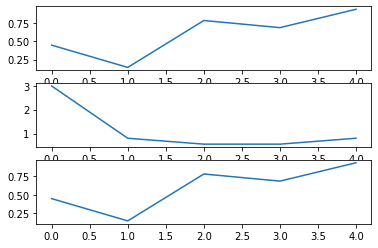

In [50]:
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
x = np.random.random_sample(5)
y = fft(x)
yinv = ifft(y)
plt.subplot(311)
plt.plot(x)
plt.subplot(312)
plt.plot(np.abs(y))
plt.subplot(313)
plt.plot(np.abs(yinv))
plt.show()

## 空间数据结构和算法 scipy.spatial

## 最优化 scipy.optimize

## 插值 scipy.interpolate
插值是在给定的已知的离散值集合范围内寻找新数据点的方法

## 线性代数 scipy.linalg

## 统计学 scipy.stats

## 多维图像处理 scipy.ndimage
图像处理和分析可以看作是对二维数组的操作。

# sympy笔记
从基本的符号算术到多项式、微积分、求解方程、离散数学、几何、统计和物理。主要处理三种类型的数据：整型数据、实数和有理数。

In [104]:
import sympy as sym
sym.init_printing(use_latex=True,fontsize='8pt')

## 符号、表达式和基本运算

In [84]:
x, y, z = sym.symbols('x y z')
m0, m1, m2, m3, m4 = sym.symbols('ma0:5')
x = m0+m1*m2/m3-m4
x

## 求解方程
solve可求解各种类型的方程，需要输入两个参数：待解的表达式和变量

In [85]:
sym.solve(6*y**2-3*y-30,y) # 默认方程等式右边的值是0

In [87]:
x, y = sym.symbols('x y')
sym.solve([2*x+y-4,5*x-3*y],[x,y]) # 解方程组

## 有理数、指数和对数函数

## 多项式

## 三角函数和复数

## 线性代数

## 微积分

In [91]:
sym.oo # 无穷大
6700 < sym.oo

In [98]:
x, n = sym.symbols('x n')
sym.limit(((x**n-1)/(x-1)),x,1) #极限

In [99]:
sym.limit(1/x,x,0,dir='-') # 左极限，默认右极限（+）

In [101]:
sym.diff(x**4,x) # 微分

In [105]:
sym.diff(x**4,x,2) # 多重微分

In [109]:
x = sym.symbols('x')
f = sym.symbols('f', cls=sym.Function)
sym.dsolve(f(x)-sym.diff(f(x),x), f(x)) # 解微分方程

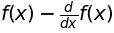

In [112]:
f(x)-sym.diff(f(x),x) # 可以表示微分方程，右侧默认等于零

In [114]:
x = sym.symbols('x')
sym.integrate(x**3+1,x) # 积分

In [117]:
x = sym.symbols('x')
sym.integrate(x**3-x**2+x, (x,0,1)) # 定积分

还包括整数序列和幂级数等

## 向量、物理模块、力学

## 打印功能

## 密码学、逻辑模块

## 几何模块、符号积分

## 多项式操作、集合

## 运算的简化与合并

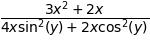

In [119]:
from sympy.abc import x,y
expr = (2*x+3*x**2)/(4*x*sym.sin(y)**2+2*x*sym.cos(y)**2)
expr

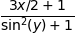

In [120]:
sym.simplify(expr) # 简化多项式与三角函数

# matplotlib笔记

## matplotlib的构架
* 最重要的对象是Figure
* 构架分为三层：后端（backend），艺术家（artist）、脚本（scripting）

### 脚本层（pyplot）
pyplot接口管理创建图形、坐标轴以及它们与后端层的连接。

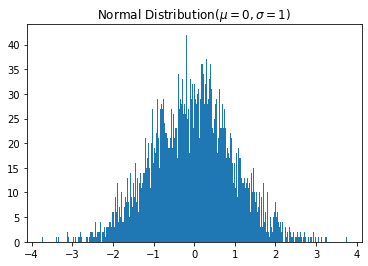

In [126]:
import matplotlib.pyplot as plt
import numpy as np
var = np.random.randn(5300)
plt.hist(var,530)
plt.title('Normal Distribution($\mu=0, \sigma=1$)')
plt.show()

### 艺术家层（matplotlib.artist.Artist）
在matplotlib的Figure中显示的每个对象都是Artist的一个实例，包括图形标题、坐标轴、数字标签、图像、线、条形图与点。

### 后端层
画板、纸、上色等功能，还可以整合其它工具箱，例如Qt。

## 画图方法

### 线图

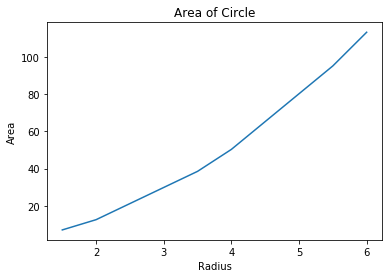

In [132]:
# 圆的半径和面积的对应关系
r = [1.5,2.0,3.5,4.0,5.5,6.0] # 半径
a = np.power(r,2)*np.pi # 面积
plt.plot(r,a)
plt.xlabel('Radius')
plt.ylabel('Area')
plt.title('Area of Circle')
plt.show()

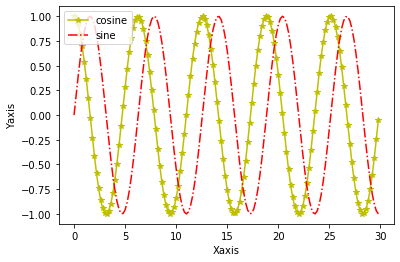

In [152]:
var = np.arange(0,30,0.2)
cos_var = np.cos(var)
sin_var = np.sin(var)
plt.plot(var, cos_var, 'y-*', label='cosine')
plt.plot(var, sin_var, 'r-.', label='sine')
plt.legend(loc='upper left') # 小标左上
plt.xlabel('Xaxis')
plt.ylabel('Yaxis')
# plt.ylim((-1.5, 1.5)) # 改变坐标轴显示范围
plt.show()

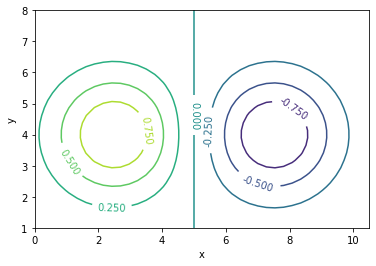

In [158]:
# 等高线
x = np.linspace(0,10.5,40)
y = np.linspace(1,8,30)
(X,Y) = np.meshgrid(x,y)
func = np.exp(-((X-2.5)**2+(Y-4)**2)/4)-np.exp(-((X-7.5)**2+(Y-4)**2)/4)
contr = plt.contour(x,y,func)
plt.clabel(contr)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# IPython
* ?号显示功能列表
* %quickref显示命令简介
* %magic显示魔法命令的使用方法
* 如果我们输入任何Python对象后加？号，就会显示这个对象的文字说明、功能以及构建方法
* 操作系统命令接口：在命令前加！号，就可以执行任何操作系统命令和执行脚本文件，比如ls
* 调试：%debug可以启动python的调试器，打印变量结果、执行语句、追踪异常来源等
* 用户可以通过%run -d programname.py命令单步调试程序